# Working With Proteins

It is 
* Hard
* Dumb
* Weird

In [8]:
from Bio.PDB import *
cutoff = 3.5
parser = PDBParser()
structure = parser.get_structure('4hj2', '4hj2.pdb')
chain = structure.get_chains().next()
searcher = NeighborSearch([atom for atom in chain.get_atoms() if atom.name in ('O','N')])
neighbors = searcher.search_all(cutoff, level='R')
neighbors

[(<Residue LYS het=  resseq=135 icode= >,
  <Residue LEU het=  resseq=137 icode= >),
 (<Residue ILE het=  resseq=93 icode= >,
  <Residue ILE het=  resseq=96 icode= >),
 (<Residue LEU het=  resseq=210 icode= >,
  <Residue GLU het=  resseq=212 icode= >),
 (<Residue LYS het=  resseq=149 icode= >,
  <Residue LEU het=  resseq=150 icode= >),
 (<Residue ALA het=  resseq=73 icode= >,
  <Residue LEU het=  resseq=78 icode= >),
 (<Residue ARG het=  resseq=184 icode= >,
  <Residue LEU het=  resseq=188 icode= >),
 (<Residue PRO het=  resseq=200 icode= >,
  <Residue LYS het=  resseq=202 icode= >),
 (<Residue PRO het=  resseq=189 icode= >,
  <Residue LYS het=  resseq=192 icode= >),
 (<Residue LEU het=  resseq=105 icode= >,
  <Residue CYS het=  resseq=109 icode= >),
 (<Residue GLU het=  resseq=36 icode= >,
  <Residue LYS het=  resseq=40 icode= >),
 (<Residue PHE het=  resseq=133 icode= >,
  <Residue VAL het=  resseq=136 icode= >),
 (<Residue ALA het=  resseq=116 icode= >,
  <Residue LEU het=  resseq=1

In [9]:
import numpy as np
contacts = np.zeros([len(chain), len(chain)])
for n in neighbors:
    contacts[n[0].id[1] - 1, n[1].id[1] - 1] = 1
    contacts[n[1].id[1] - 1, n[0].id[1] - 1] = 1
for i in xrange(len(chain)):
    contacts[i,i] = 0
contacts

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.]])

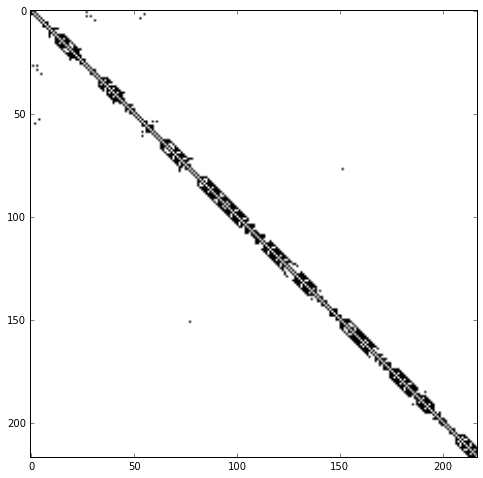

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
a = plt.imshow(contacts, cmap="Greys")

In [11]:
helices = []
helix = set()
for i in xrange(len(chain)):
    try:
        if contacts[i][i+3]:
            if abs(chain[i]['O'] - chain[i+3]['N']) <= cutoff:
                helix.add(chain[i])
                continue
    except:
        pass
    
    try:
        if contacts[i][i-3]:
            if abs(chain[i-3]['O'] - chain[i]['N']) <= cutoff:
                helix.add(chain[i])
    except:
        pass
        
    if len(helix) >= 6:
        helix = list(helix)
        helix.sort(key=lambda x: x.id[1])
        helices.append(helix)
        helix = set()
helix_ranges = []
for i in helices:
    helix = "%s-%s" % (str(i[0].id[1]), str(i[-1].id[1]))
    print helix
    helix_ranges.append(helix)

13-18
19-35
37-42
43-71
74-89
90-97
98-105
108-121
122-136
137-164
165-181
182-193
194-213


In [12]:
import nglview
view = nglview.show_structure_file('4hj2.pdb')
view.clear_representations()
view.add_cartoon(selection='protein', color='blue')
for helix in helix_ranges:
    view.add_cartoon(selection=helix, color='red')
view

In [7]:
view2 = nglview.show_structure_file('4hj2.pdb')
view2